# Handwritten Digit Recognition with Support Vector Machine 

Yang Xu (Net ID: yx2378)

### 1. Introduction
Digit recognition is one of the most challenging machine learning problems. The task is to take as input a picture of a single digit and classify which digit the picture represents. The data is a subset of the MNIST Database of handwritten digits. The data contains labeled train data and unlabeled test data, which are the gray-scale images of handwritten digits, from 0 through 9. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value between 0 and 255, inclusive. Since each pixel contains a numeric value, it can be regarded as a feature and can be used to train and evaluate machine learning algorithms.

### 2. Methods

This project is done by Support Vector Machine (SVM), which has been proved to be an effective way to do digit recognition. SVM aims to find the optimal hyperplane that separates two classes with the maximal margin. In this project, I'm going to try two variaties of SVM: SVM with linear kernel and SVM with Gaussian kernel. The introduction for SVM can be found here https://en.wikipedia.org/wiki/Support_vector_machine


### 3. Results

The SVM with linear kernel assumes that the data is linearly separable. However, it is usually not true in real life, and therefore its average accuracy is only around 87.0% for this project. With kernel trick, the features are mapped from the given space into a very high dimensional space, therefore the data becomes linearly separable. Gaussian kernel performed super well on this problem, and it is given as $K(x, x') = exp(-\gamma ||x - x'||^2)$. The method can achieve 97.3% average accuracy rate. The introduction about kernel method can be found here: https://en.wikipedia.org/wiki/Kernel_method

### 4. Build SVM (Linear Kernel) From Scratch

I've had experience of building SVM in R, however, R always passes object by copy, which makes it very slow to deal with big dataset. Therefore, it's worthwhile to learn how to build SVM from scratch in Python.

Suppose we have n pairs of training data $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$, where $x_i \in R^d$, and $y_i \in \{-1, 1\}$.

The cost of SVM is

$$f(w, b) = \frac{1}{2} \sum_{i=1}^d (w^{(j)})^2 + C \sum_{i=1}^n max \{0, 1 - y_i (\sum_{i=1}^d w^{(j)} x_i^{(j)} + b)\}$$

Define $L(w, b; x_i, y_i) = max\{0, 1 - y_i (\sum_{i=1}^d w^{(j)} x_i^{(j)} + b)\}$.

Then $$\nabla_{w^{(j)}} f(w, b) = \frac{\partial f(w,b)}{\partial w^{(j)}} = w_j + C \sum_{i=1}^n \frac{\partial L(w, b; x_i, y_i)}{\partial w^{(j)}}$$

and

$$\nabla_b f(w, b) = \frac{\partial f(w,b)}{\partial b} = C \sum_{i=1}^n \frac{\partial L(w, b; x_i, y_i)}{\partial b}$$


#### 4.1 Batch gradient descent

- k = 0
- while not converged do
    * for j = 1, ..., d do
    
       - Update $w^{(j)} \leftarrow w^{(j)} - \eta \nabla_{w(j)} f(w, b)$
    
    end for
    
    * Update $b \leftarrow b - \eta \nabla_b f(w, b)$
    * Update $k \leftarrow k + 1$
    
 end while

#### 4.2 Mini-batch gradient descent

- Randomly shuffle the training data
- i = 1, k = 0
- while not converged do
    * for j = 1, ..., d do
        
         Update $w^{(j)} \leftarrow w^{(j)} - \eta \nabla_{w(j)} f_i (w, b)$
     
    end for
    
    * Update $b \leftarrow b - \eta \nabla_b f_i (w, b)$
    * Update $i \leftarrow i \text{ mod } n$ 
    * Update $k \leftarrow k + 1$
    
 end while

The algorithm is borrowed from the lecture slide of Statistical Machine Learning class.

### 5. Code dependency

- numpy
- pandas
- scikit-learn
- matplotlib
- data: https://www.kaggle.com/c/digit-recognizer/data

You will be able to run the following codes if you install the packages listed above and download the data.

### 6. Project Evaluation

The problem encourtered in this project are mainly how to code the mathmatical formular correctly, and also how to vectorize the calculation to speed up the algorithm. 

Python is a good fit for this project, since it has well-maintained numerical analysis libraries such as Numpy. Numpy is able to deal with matrix operations in a very fast way, since it is mostly written in C and it avoids coping large data by passing by pointer/reference. Python also have the good support for data visualization, such as matplotlib. Additionally, the package scikit learn provides a set of common machine learning algorithms and a consistent interface, which makes machine laerning much easier. Therefore, I'm greatly happy with doing machine learning with Python, and I believe it will be helpful for my future career in data science. 

### 6. Code Structure

- 6.1 Visualizing training data
- 6.2 SVM with Linear Kernel Using Scikit-learn
- 6.3 SVM with Gaussian Kernel Using Scikit-learn
- 6.4. Build SVM from Scratch
    * 6.4.1 Using Batch Gradient Descent
    * 6.4.2 Using Mini-batch Gradient Descent

In [1]:
## import library
import sys
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### 6.1. Data Visualization

In [4]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
y = train["label"]
X = train.drop("label",1)
X_train, X_test, y_train, y_test = train_test_split(
     X, y, train_size = 0.3, test_size=0.3, random_state=1)

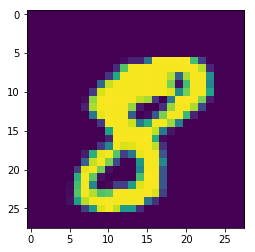

In [5]:
one_img = train.iloc[10,1:].values.reshape([28, 28])
plt.imshow(one_img)

### 6.2. SVM with Linear Kernel Using Scikit-learn

Using grid search to select the best performing paramter. It will take around 5 mins (it also depends on how many CPUs you have on your laptop).

In [6]:
# SVM with kernel = 'linear'
linear_svm = LinearSVC(penalty='l2', loss='hinge', multi_class='ovr')

C = [0.001, 0.01, 0.1, 1, 10]

linear_svm_param_grid = dict(C = C)

linear_svm_grid = GridSearchCV(linear_svm, linear_svm_param_grid, 
                               cv=4, 
                               scoring='accuracy', n_jobs = 4, verbose = 5)

In [7]:
linear_svm_grid.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV] C=0.001 .........................................................
[CV] C=0.001 .........................................................
[CV] C=0.001 .........................................................
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.849921, total= 1.0min
[CV] C=0.01 ..........................................................
[CV] .......................... C=0.001, score=0.857687, total= 1.1min
[CV] C=0.01 ..........................................................
[CV] .......................... C=0.001, score=0.858820, total= 1.2min
[CV] C=0.01 ..........................................................
[CV] .......................... C=0.001, score=0.853249, total= 1.2min
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.848967, total= 1.1min
[CV] C=0.1 ......

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  3.0min


[CV] ............................ C=0.1, score=0.865165, total=  41.9s
[CV] C=1 .............................................................
[CV] ............................ C=0.1, score=0.852922, total=  40.4s
[CV] C=1 .............................................................
[CV] .............................. C=1, score=0.859777, total=  32.9s
[CV] C=10 ............................................................
[CV] .............................. C=1, score=0.862770, total=  34.6s
[CV] C=10 ............................................................
[CV] .............................. C=1, score=0.845959, total=  35.8s
[CV] .............................. C=1, score=0.843274, total=  35.3s
[CV] C=10 ............................................................
[CV] C=10 ............................................................
[CV] ............................. C=10, score=0.853418, total=  32.4s
[CV] ............................. C=10, score=0.858954, total=  35.0s
[CV] .

[Parallel(n_jobs=4)]: Done  18 out of  20 | elapsed:  4.2min remaining:   27.9s


[CV] ............................. C=10, score=0.869924, total=  34.0s


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  4.2min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=5)

In [8]:
linear_svm_grid.best_params_

{'C': 10}

In [9]:
linear_svm_y_pred = linear_svm_grid.predict(X_test)

# accuracy
print("accuracy rate:", accuracy_score(y_test, linear_svm_y_pred))

accuracy rate: 0.866904761905


So, the accuracy rate is around 86.7%.

### 6.3. SVM with Gaussian Kernel Using Scikit-learn

In [10]:
# SVM, Gaussian Kernel
gauss_svm = SVC(kernel = 'rbf', decision_function_shape ='ovr')

gamma = [0.00000001, 0.00000005, 0.0000001, 0.0000005]
C = [0.1, 1, 10]

# http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
# very sensitive to gamma
# choose smaller C to favor model that use less memory

gauss_svm_param_grid = dict(C = C, gamma = gamma)

gauss_svm_grid = GridSearchCV(gauss_svm, gauss_svm_param_grid, cv=4, scoring='accuracy',
                             verbose = 5, n_jobs = -1)

In [11]:
gauss_svm_grid.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] C=0.1, gamma=1e-08 ..............................................
[CV] C=0.1, gamma=1e-08 ..............................................
[CV] C=0.1, gamma=1e-08 ..............................................
[CV] C=0.1, gamma=1e-08 ..............................................
[CV] ............... C=0.1, gamma=1e-08, score=0.781240, total= 5.4min
[CV] C=0.1, gamma=5e-08 ..............................................
[CV] ............... C=0.1, gamma=1e-08, score=0.787322, total= 5.4min
[CV] C=0.1, gamma=5e-08 ..............................................
[CV] ............... C=0.1, gamma=1e-08, score=0.789975, total= 5.4min
[CV] C=0.1, gamma=5e-08 ..............................................
[CV] ............... C=0.1, gamma=1e-08, score=0.783037, total= 5.4min
[CV] C=0.1, gamma=5e-08 ..............................................
[CV] ............... C=0.1, gamma=5e-08, score=0.890228, total= 2.6min
[CV] C=0.1, gamm

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 16.7min


[CV] ............... C=0.1, gamma=1e-07, score=0.907472, total= 2.6min
[CV] C=0.1, gamma=5e-07 ..............................................
[CV] ............... C=0.1, gamma=1e-07, score=0.921537, total= 2.7min
[CV] C=0.1, gamma=5e-07 ..............................................
[CV] ............... C=0.1, gamma=5e-07, score=0.933122, total= 2.3min
[CV] C=1, gamma=1e-08 ................................................
[CV] ............... C=0.1, gamma=5e-07, score=0.937183, total= 2.3min
[CV] C=1, gamma=1e-08 ................................................
[CV] ............... C=0.1, gamma=5e-07, score=0.928458, total= 2.3min
[CV] C=1, gamma=1e-08 ................................................
[CV] ............... C=0.1, gamma=5e-07, score=0.941233, total= 2.3min
[CV] C=1, gamma=1e-08 ................................................
[CV] ................. C=1, gamma=1e-08, score=0.907043, total= 2.0min
[CV] C=1, gamma=5e-08 ................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 41.9min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1, 10], 'gamma': [1e-08, 5e-08, 1e-07, 5e-07]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=5)

In [12]:
# predict
gauss_svm_y_pred = gauss_svm_grid.predict(X_test)

# accuracy
print("accuracy rate:", accuracy_score(y_test, gauss_svm_y_pred))

accuracy rate: 0.974761904762


So, the accuracy rate is around 97.5%, which is much better than SVM with Gaussian kernel.

### 6.4. Build SVM from Scratch

In [6]:
def cost_pct_change(pre_cost, cur_cost):
    return np.abs(pre_cost - cur_cost)*100.0/pre_cost

    
def cost(X, y, w, b, C):
    '''
    Calculate the cost.
    '''
    penalty = 1 - np.multiply(y, np.dot(X, w) + b)
    penalty[penalty < 0] = 0

    cost = 1.0/2*sum(w ** 2) + C * np.sum(penalty) 
    return cost

def accuracy_rate(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [7]:
# data: predict 2 and 7, 2 -> 1, 7 -> -1
X_train_binary = X_train[(y_train == 2) | (y_train == 7)]
y_train_binary = y_train[(y_train == 2) | (y_train == 7)]
y_train_binary[y_train_binary == 2] = 1.0
y_train_binary[y_train_binary == 7] = -1.0

X_test_binary =  X_test[(y_test == 2) | (y_test == 7)]
y_test_binary =  y_test[(y_test == 2) | (y_test == 7)]
y_test_binary[y_test_binary == 2] = 1
y_test_binary[y_test_binary == 7] = -1

### 6.4.1 Batch Gradient Descent

In [8]:
def batch_gd(X, y, w0, b0 = 0, eta = 0.0000003, epsilon = 0.25, C = 100):
    '''
    X: A (n, d) numpy array.
    y: A (n, ) numpy array.
    w0: A (d, ) numpy array. The initial value for the weight.
    b0: A scalar. The initial value for intercept.
    eta: learning rate of the gradient descent.
    epsilon: the convergence criteria.
    C: A scalar. The tuning parameter for penalty in svm.
    '''
    
    def derivative(X, y, w, b, C):
        '''
        Calculate the derivative.
        '''
        criteria = y * (np.dot(X, w) + b) 

        deri_w = -1.0*(X.T * y).T # n by d matrix
        deri_w[(criteria>=1),] = 0

        deri_b = -1.0 * y
        deri_b[(criteria>=1)] = 0

        # (derivative w.r.t w, derivative w.r.t b)
        return (w + C * np.sum(deri_w, axis = 0), C * np.sum(deri_b))

    
    pre_w = w0
    pre_b = b0
        
    pre_cost = sys.maxsize
    cur_cost = cost(X, y, pre_w, pre_b, C)
    
    all_cost = [cur_cost]
    
    while cost_pct_change(pre_cost, cur_cost) >= epsilon:
        
        all_derivative = derivative(X, y, pre_w, pre_b, C)
        # update w
        cur_w = pre_w - eta * all_derivative[0]
        
        # update b
        cur_b = pre_b - eta * all_derivative[1]

        # update cost
        pre_cost = cur_cost
        cur_cost = cost(X, y, cur_w, cur_b, C)
        all_cost.append(cur_cost)
        
        pre_w = cur_w
        pre_b = cur_b
        
    return (cur_w, cur_b, all_cost)
    

In [9]:
%%time
w0 = np.zeros( X_train_binary.shape[1] )
final_w, final_b, batch_cost = batch_gd(X_train_binary.values, y_train_binary.values, w0, b0 = 0, 
                                        eta = 0.0000003, epsilon = 0.25, C = 100)
batch_cost = pd.DataFrame(batch_cost[1:])

CPU times: user 5.37 s, sys: 2.39 s, total: 7.77 s
Wall time: 14.9 s


It takes around 14.9 seconds to execture the program. (Depends on the computing speed of your laptop.)

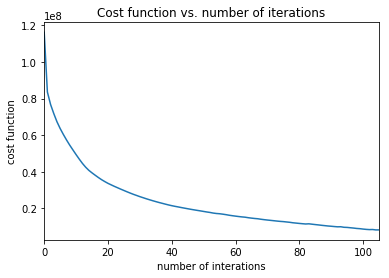

In [10]:
# visualize the cost function
ax = batch_cost.plot(title = "Cost function vs. number of iterations", legend=False)
ax.set_xlabel("number of interations")
ax.set_ylabel("cost function")
ax

As we can see from the above graph, the cost function decreased smoothly, which is what we expected. 

In [11]:
# accuracy rate
y_test_pred = np.dot(X_test_binary, final_w) + final_b
y_test_pred[y_test_pred >= 0] = 1
y_test_pred[y_test_pred < 0] = -1
accuracy_rate(y_test_pred, y_test_binary)

0.97915027537372146

As we can see from the above, the accuracy rate is around 97.9% to tell digit 2 from digit 7.

### 6.4.2 Minibatch Gradient Descent

In [22]:
def minibatch_gd(X, y, w0, b0 = 0, eta = 5e-7, epsilon = 0.01, C = 0.01, batch_size = 100):
    #def minibatch_gd(X, y, w0, b0 = 0, eta = 0.1, epsilon = 0.01, C = 0.01, batch_size = 20):
    '''
    X: A (n, d) numpy array.
    y: A (n, ) numpy array.
    w0: A (d, ) numpy array. The initial value for the weight.
    b0: A scalar. The initial value for intercept.
    eta: learning rate of the gradient descent.
    epsilon: the convergence criteria.
    C: A scalar. The tuning parameter for penalty in svm.
    '''
    
    def derivative(X, y, w, b, C):
        '''
        Calculate the derivative.
        '''
        criteria = y * (np.dot(X, w) + b) 

        deri_w = -1.0*(X.T * y).T # n by d matrix
        deri_w[criteria>=1,] = 0

        deri_b = -1.0 * y
        deri_b[criteria>=1] = 0

        # (derivative w.r.t w, derivative w.r.t b)
        return (w + C * np.sum(deri_w, axis = 0), C * np.sum(deri_b))

    
    # randomly shuffle the training data
    np.random.shuffle(X)
    n = X.shape[0]
    
    pre_w = w0
    pre_b = b0
        
    pre_cost = 10000
    cur_cost = cost(X, y, pre_w, pre_b, C)
    all_cost = [cur_cost]
    
    pre_cost_cache = [pre_cost] 
    cur_cost_cache = [cur_cost]
    diff = np.abs(np.mean(pre_cost_cache) - np.mean(cur_cost_cache))
    
    l = 0

    while diff >= epsilon:
        #print(diff) 
        all_derivative = derivative(X[int(l*batch_size): int(min(n, (l+1)*batch_size)), ],
                                    y[int(l*batch_size): int(min(n, (l+1)*batch_size))  ], 
                                    pre_w, pre_b, C)
        # update w
        cur_w = pre_w - eta * all_derivative[0]
        
        # update b
        cur_b = pre_b - eta * all_derivative[1]

        # update cost
        cur_cost = cost(X, y, cur_w, cur_b, C)
        all_cost.append(cur_cost)
        cur_cost_cache.append(cur_cost)
        
        pre_w = cur_w
        pre_b = cur_b
        
        l = (l+1) % int((n + batch_size - 1)/batch_size)
        #print(l)
        if l == 0:
            diff = np.abs(np.mean(pre_cost_cache) - np.mean(cur_cost_cache))
            #print(diff)
            pre_cost_cache = cur_cost_cache
            cur_cost_cache = []
        
    return all_cost

In [23]:
%%time
w0 = np.zeros( X_train_binary.shape[1] )
minibatch_cost = minibatch_gd(X_train_binary.values, y_train_binary.values, w0, b0 = 0)
minibatch_cost = pd.DataFrame(minibatch_cost)

CPU times: user 23.8 s, sys: 6.03 s, total: 29.8 s
Wall time: 15.5 s


It takes around 15.5 seconds to execture the program. (Depends on the computing speed of your laptop.)

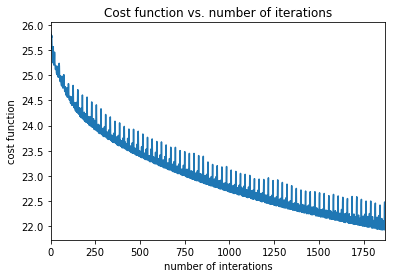

In [24]:
# visualize the cost function
ax = minibatch_cost.plot(title = "Cost function vs. number of iterations", legend=False)
ax.set_xlabel("number of interations")
ax.set_ylabel("cost function")
ax

As we can see from the above graph, the cost function decreased, but there was some oscillation, which is what we expected. 

### 6.5. Comparison of Batch Gradient Descent and Minibatch Gradient Descent

- Batch gradient descent computes the gradient using the whole dataset. It usually converges slower than minibatch gradient descent. (This dataset is small, so batch gradient descent is faster than minibatch gradient descent)

- Minibatch gradient descent makes it easier for online learning, since user can always update the weight when new data comes. Therefore, minibatch gradient descent is widely applied in industry.